## Used Car Price Prediction

### Objective:
To predict the costs of used cars from the data collected from various sources and distributed across various locations in India.

#### Features:

- Brand : The brand name of the car.
- Model : The model name of the brand car.
- Variant : The variant of the model
- Location: The location in which the car is being sold or is available for purchase.
- Manufacturing Year: The year or edition of the model.
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.
- Fuel_Type: The type of fuel used by the car.
- Transmission: The type of transmission used by the car.
- Owner_Type: Whether the ownership is Firsthand, Second hand or other.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in cc.
- Power: The maximum power of the engine in bhp.
- Price: The price of the used car in INR Lakhs.

#### Importing libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy import stats

import plotly.express as px
import plotly.offline
import plotly.graph_objs as go

import warnings
warnings.simplefilter('ignore')

In [2]:
#uploading the dataset
df= pd.read_excel('Used_CarPrice.xlsx')

In [3]:
#Lets see the first five data 
df.head()

,Unnamed: 0,Brand,Model,Variant,Location,Manufacturing_Year,Driven_Kilometers,Fuel_type,Owner_type,Engine,Car_Transmission,Car_Power,Mileage,Price
0,0,Toyota,Corolla Altis,1.8 GL,Delhi,2010,"89,000 Kms",Petrol,First,"1794 cc, 4 Cylinders Inline, 4 Valves/Cylinder",Manual - 5 Gears,132@6000,9.8 kmpl,3.1 Lakh
1,1,Hyundai,Creta,1.6 SX Plus AT Petrol,Delhi,2017,"57,000 Kms",Petrol,First,"1591 cc, 4 Cylinders Inline, 4 Valves/Cylinder...",Automatic - 6 Gears,122 bhp @ 6400 rpm,15.29 kmpl,10.25 Lakh
2,2,Tata,Tiago,Revotron XZ,Delhi,2019,"11,264 Kms",Petrol,First,"1199 cc, 3 Cylinders Inline, 4 Valves/Cylinder...",Manual - 5 Gears,84 bhp @ 6000 rpm,23.84 kmpl,4.75 Lakh
3,3,Honda,City,1.5 E MT,Delhi,2013,"62,904 Kms",Petrol,First,NaN,-,-,-,4.35 Lakh
4,4,Maruti Suzuki,Alto 800,Lxi,Noida,2013,"41,360 Kms",Petrol,First,"796 cc, 3 Cylinders Inline, 4 Valves/Cylinder,...",Manual - 5 Gears,47 bhp @ 6000 rpm,22.74 kmpl,2.25 Lakh


In [4]:
#Now lets see the last 5 data
df.tail()

,Unnamed: 0,Brand,Model,Variant,Location,Manufacturing_Year,Driven_Kilometers,Fuel_type,Owner_type,Engine,Car_Transmission,Car_Power,Mileage,Price
6262,6262,BMW,3-Series,320i Luxury Line,Delhi,2017,"19,000 Kms",Petrol,First,"1998 cc, 4 Cylinders Inline, 4 Valves/Cylinder...","Automatic - 8 Gears, Manual Override, Sport Mode",181 bhp @ 5000 rpm,17.61 kmpl,29.5 Lakh
6263,6263,Honda,Amaze,1.5 VX i-DTEC,Delhi,2014,"85,000 Kms",Diesel,First,"1498 cc, 4 Cylinders Inline, 4 Valves/Cylinder...",Manual - 5 Gears,99 bhp @ 3600 rpm,25.8 kmpl,3.25 Lakh
6264,6264,BMW,5-Series,520d Sedan,Delhi,2016,"55,000 Kms",Diesel,First,"1995 cc, 4 Cylinders Inline, 4 Valves/Cylinder",Automatic - 8 Gears,184 bhp @ 4000 rpm,18.48 kmpl,24.75 Lakh
6265,6265,BMW,3-Series,320d,Delhi,2012,"69,000 Kms",Diesel,Second,-,-,-,-,8.5 Lakh
6266,6266,Porsche,Cayenne,S Diesel,Delhi,2015,"75,000 Kms",Diesel,Second,"4134 cc, 8 Cylinders In V Shape, 4 Valves/Cyli...","Automatic - 8 Gears, Sport Mode",382 bhp @ 3750 rpm,-,48 Lakh


In [5]:
#lets check the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          6267 non-null   int64 
 1   Brand               6267 non-null   object
 2   Model               6267 non-null   object
 3   Variant             6267 non-null   object
 4   Location            6267 non-null   object
 5   Manufacturing_Year  6267 non-null   int64 
 6   Driven_Kilometers   6267 non-null   object
 7   Fuel_type           6267 non-null   object
 8   Owner_type          6267 non-null   object
 9   Engine              6120 non-null   object
 10  Car_Transmission    6267 non-null   object
 11  Car_Power           6267 non-null   object
 12  Mileage             6267 non-null   object
 13  Price               6267 non-null   object
dtypes: int64(2), object(12)
memory usage: 685.6+ KB


Here we can see that we have 13 columns and 6267 rows, where some null values are present in some columns and also some columns like Driven kilometers,Engine, Car power , mileage and price object data type which will be converted into Integer datatype later.

In [6]:
#checking the null values
df.isnull().sum()

Unnamed: 0              0
Brand                   0
Model                   0
Variant                 0
Location                0
Manufacturing_Year      0
Driven_Kilometers       0
Fuel_type               0
Owner_type              0
Engine                147
Car_Transmission        0
Car_Power               0
Mileage                 0
Price                   0
dtype: int64

Here I have null values in Engine , but there are also '-' in some columns , so first I check those and convert them to Nan after that I'll handle the missing values later.

<AxesSubplot:>

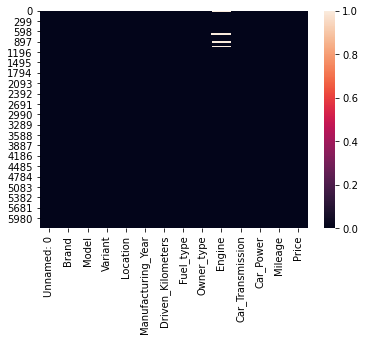

In [7]:
#Checking by graphically
sns.heatmap(df.isnull())

Here we can see that in Engine we have the missing value which we will be handle later.


In [8]:
#filling the missing value 
df=df.fillna(np.nan)

In [9]:
df.head()

,Unnamed: 0,Brand,Model,Variant,Location,Manufacturing_Year,Driven_Kilometers,Fuel_type,Owner_type,Engine,Car_Transmission,Car_Power,Mileage,Price
0,0,Toyota,Corolla Altis,1.8 GL,Delhi,2010,"89,000 Kms",Petrol,First,"1794 cc, 4 Cylinders Inline, 4 Valves/Cylinder",Manual - 5 Gears,132@6000,9.8 kmpl,3.1 Lakh
1,1,Hyundai,Creta,1.6 SX Plus AT Petrol,Delhi,2017,"57,000 Kms",Petrol,First,"1591 cc, 4 Cylinders Inline, 4 Valves/Cylinder...",Automatic - 6 Gears,122 bhp @ 6400 rpm,15.29 kmpl,10.25 Lakh
2,2,Tata,Tiago,Revotron XZ,Delhi,2019,"11,264 Kms",Petrol,First,"1199 cc, 3 Cylinders Inline, 4 Valves/Cylinder...",Manual - 5 Gears,84 bhp @ 6000 rpm,23.84 kmpl,4.75 Lakh
3,3,Honda,City,1.5 E MT,Delhi,2013,"62,904 Kms",Petrol,First,NaN,-,-,-,4.35 Lakh
4,4,Maruti Suzuki,Alto 800,Lxi,Noida,2013,"41,360 Kms",Petrol,First,"796 cc, 3 Cylinders Inline, 4 Valves/Cylinder,...",Manual - 5 Gears,47 bhp @ 6000 rpm,22.74 kmpl,2.25 Lakh


#### Cleaning  and converting the datatype

The columns of Mileage, Engine and Power are of string types and so we need to remove the string associated with it and convert it to float type.

In [10]:
df['Mileage'] = df['Mileage'].str.replace(' km/kg', '')
df['Mileage'] = df['Mileage'].str.replace(' kmpl', '')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

In [11]:
#We find that the column of Engine contains unit as "CC"as units.
df['Engine'] = df['Engine'].astype(str).map(lambda x : x.split(' ')[0])

df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

In [12]:
df['Power(bhp)'] = df['Car_Power'].astype(str).map(lambda x : x.split(' ')[0])
#Again now without '@'
df['Power(bhp)'] = df['Power(bhp)'].astype(str).map(lambda x : x.split('@')[0])

df['Power(bhp)'] = pd.to_numeric(df['Power(bhp)'], errors='coerce')

In [13]:
#Selecting the first value and then converting to integer
df['Driven_Kilometers']=df['Driven_Kilometers'].astype(str).map(lambda x: x.split(' ')[0])
df['Driven_Kilometers']=df['Driven_Kilometers'].str.replace(',', '').astype(int)

In [14]:
df.dtypes

Unnamed: 0              int64
Brand                  object
Model                  object
Variant                object
Location               object
Manufacturing_Year      int64
Driven_Kilometers       int32
Fuel_type              object
Owner_type             object
Engine                float64
Car_Transmission       object
Car_Power              object
Mileage               float64
Price                  object
Power(bhp)            float64
dtype: object

In [15]:
df.head()

,Unnamed: 0,Brand,Model,Variant,Location,Manufacturing_Year,Driven_Kilometers,Fuel_type,Owner_type,Engine,Car_Transmission,Car_Power,Mileage,Price,Power(bhp)
0,0,Toyota,Corolla Altis,1.8 GL,Delhi,2010,89000,Petrol,First,1794.0,Manual - 5 Gears,132@6000,9.80,3.1 Lakh,132.0
1,1,Hyundai,Creta,1.6 SX Plus AT Petrol,Delhi,2017,57000,Petrol,First,1591.0,Automatic - 6 Gears,122 bhp @ 6400 rpm,15.29,10.25 Lakh,122.0
2,2,Tata,Tiago,Revotron XZ,Delhi,2019,11264,Petrol,First,1199.0,Manual - 5 Gears,84 bhp @ 6000 rpm,23.84,4.75 Lakh,84.0
3,3,Honda,City,1.5 E MT,Delhi,2013,62904,Petrol,First,NaN,-,-,NaN,4.35 Lakh,NaN
4,4,Maruti Suzuki,Alto 800,Lxi,Noida,2013,41360,Petrol,First,796.0,Manual - 5 Gears,47 bhp @ 6000 rpm,22.74,2.25 Lakh,47.0


In [16]:
#Now for the Cars transmission and Price

#Selecting only the first value of the column
df['Car_Transmission']= df['Car_Transmission'].astype(str).map(lambda x : x.split(' ')[0])




In [17]:
#Selecting only the first value of the column
df['Price'] = df['Price'].astype(str).map(lambda x: x.split(' ')[0])

In [18]:
df['Price']=df['Price'].str.replace(',', '').astype(float)

In [19]:
df.head()

,Unnamed: 0,Brand,Model,Variant,Location,Manufacturing_Year,Driven_Kilometers,Fuel_type,Owner_type,Engine,Car_Transmission,Car_Power,Mileage,Price,Power(bhp)
0,0,Toyota,Corolla Altis,1.8 GL,Delhi,2010,89000,Petrol,First,1794.0,Manual,132@6000,9.80,3.10,132.0
1,1,Hyundai,Creta,1.6 SX Plus AT Petrol,Delhi,2017,57000,Petrol,First,1591.0,Automatic,122 bhp @ 6400 rpm,15.29,10.25,122.0
2,2,Tata,Tiago,Revotron XZ,Delhi,2019,11264,Petrol,First,1199.0,Manual,84 bhp @ 6000 rpm,23.84,4.75,84.0
3,3,Honda,City,1.5 E MT,Delhi,2013,62904,Petrol,First,NaN,-,-,NaN,4.35,NaN
4,4,Maruti Suzuki,Alto 800,Lxi,Noida,2013,41360,Petrol,First,796.0,Manual,47 bhp @ 6000 rpm,22.74,2.25,47.0


In [20]:
#dropping some columns which are not important for further process
df= df.drop(['Unnamed: 0','Car_Power'],axis=1)
df.head(3)

,Brand,Model,Variant,Location,Manufacturing_Year,Driven_Kilometers,Fuel_type,Owner_type,Engine,Car_Transmission,Mileage,Price,Power(bhp)
0,Toyota,Corolla Altis,1.8 GL,Delhi,2010,89000,Petrol,First,1794.0,Manual,9.80,3.10,132.0
1,Hyundai,Creta,1.6 SX Plus AT Petrol,Delhi,2017,57000,Petrol,First,1591.0,Automatic,15.29,10.25,122.0
2,Tata,Tiago,Revotron XZ,Delhi,2019,11264,Petrol,First,1199.0,Manual,23.84,4.75,84.0


#### Filling the missing values

In [21]:
df.isnull().sum()

Brand                    0
Model                    0
Variant                  0
Location                 0
Manufacturing_Year       0
Driven_Kilometers        0
Fuel_type                0
Owner_type               0
Engine                 726
Car_Transmission         0
Mileage               1239
Price                    0
Power(bhp)             790
dtype: int64

In [22]:
df['Engine']= df['Engine'].fillna(value=np.mean(df['Engine']))
df['Engine'].head()

0    1794.000000
1    1591.000000
2    1199.000000
3    1678.322595
4     796.000000
Name: Engine, dtype: float64

In [23]:
df['Mileage']= df['Mileage'].fillna(value=np.mean(df['Mileage']))
df['Mileage'].head()

0     9.800000
1    15.290000
2    23.840000
3    17.942009
4    22.740000
Name: Mileage, dtype: float64

In [25]:
df['Power(bhp)']= df['Power(bhp)'].fillna(value=np.mean(df['Power(bhp)']))
df['Power(bhp)'].head()

0    132.000000
1    122.000000
2     84.000000
3    124.948275
4     47.000000
Name: Power(bhp), dtype: float64

In [26]:
df['Car_Transmission'] = df['Car_Transmission'].replace('-',df['Car_Transmission'].mode()[0])

In [27]:
df['Car_Transmission'].head()

0       Manual
1    Automatic
2       Manual
3       Manual
4       Manual
Name: Car_Transmission, dtype: object

In [28]:
#Checking with statistically
df.describe()

,Manufacturing_Year,Driven_Kilometers,Engine,Mileage,Price,Power(bhp)
count,6267.000000,6.267000e+03,6267.000000,6267.000000,6267.000000,6267.000000
mean,2015.046912,5.554655e+04,1678.322595,17.942009,200.183041,124.948275
std,3.331130,8.249644e+04,614.447272,3.853295,4010.409831,60.437831
min,1988.000000,4.800000e+01,4.000000,5.800000,1.000000,25.000000
25%,2013.000000,2.932400e+04,1199.000000,15.400000,4.250000,83.000000
50%,2015.000000,5.000000e+04,1582.000000,17.942009,6.950000,118.000000
75%,2018.000000,7.140650e+04,1984.000000,20.200000,15.500000,148.000000
max,2021.000000,4.500000e+06,6752.000000,47.450000,95000.000000,616.000000


Inferences:

here the minimum year is 1988 and the latest is 2021.

The distribution in Price is not normal as data is positively skewed

here in some column  mean is greater than the median, the distribution is positively skewed.

There is huge difference in max and 75% of Engine and also for the power that means outliers are also present.

## Exploratory Data Analysis

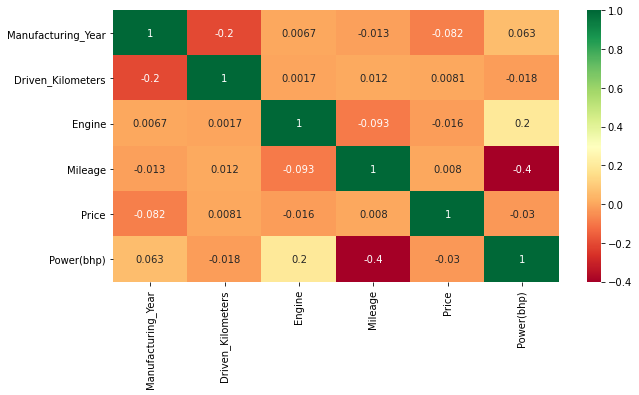

In [29]:
#Lets see the graphical representation of the correlation
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

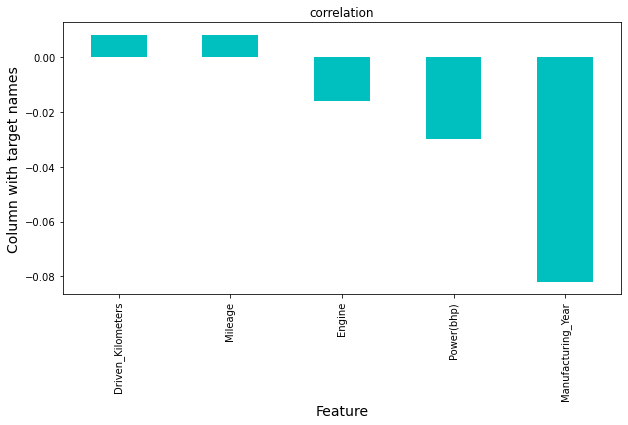

In [30]:
plt.figure(figsize=(10,5))
df.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation')
plt.show()

Observations :

- Manufacturing Year,Engine and Power are negatively correlated with price.


#### Price

Skewness: 21.700453
Kurtosis: 475.068532


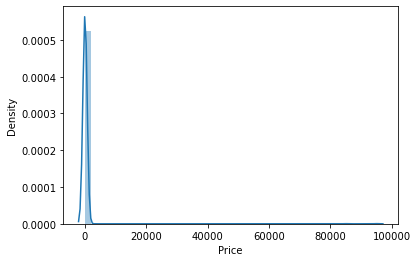

In [31]:
sns.distplot(df['Price'])

print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

We can observe that the distribution of prices shows a high positive skewness to the left (skew > 1). A kurtosis value of 475 is very high, meaning that there is a profusion of outliers in the dataset.

- A non normal positively skewed random variable can be converted into a normally distributed random variable by applying log1p transformation.

- Whenever we have positively skewed data, we apply log transformation to bring them to same scale. Eg: if data was 1, 10,1000,10000 etc then applying log would change them to 0,1,3,4.
 
- However, remember that log only works when all elements are greater than zero. In our case data is positively skewed and also contains 0 then we can not apply log transformation directly

- and hence we add 1 to every element and then apply log i.e. log(1+x) which in numpy can be done by log1p (meaning log 1 plus x)

- To check whether the log1p transformation worked i.e. our variable actually became normal after applying log1p, we run any statistical tests (Anderson Darling Test, KS Test etc) or simply check the probability plot.

- If the data is distributed along the diagonal line of the plot then it means that the data is normal and the transformation worked as expected.

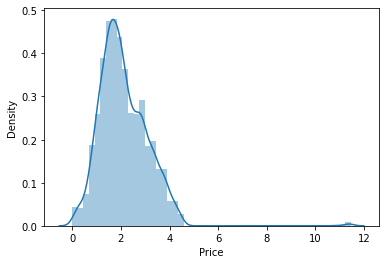

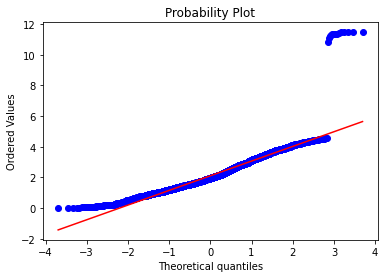

In [32]:
#applying log transformation
df['Price'] = np.log(df['Price'])
sns.distplot(df['Price'], fit=None);
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)

Here we can see that the data is not well normally distributed.

In [39]:
df['Price'].skew()

-0.1476165037071258

In [34]:
df['Price'].kurt()

14.274080956523985

Still the kurtosis is very high.Therefore we use log1p now

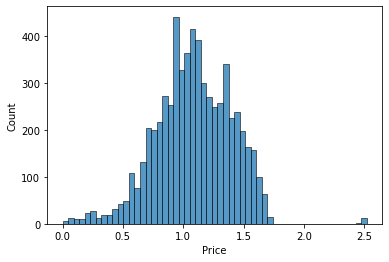

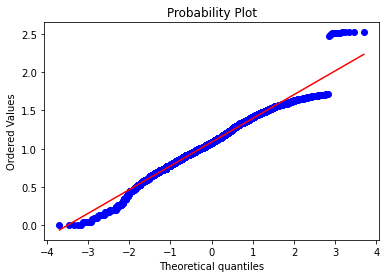

In [35]:
# We will be using logarithmic transformation log1p - Histogram PLOT
# In log1p = LOG(P+1)  --> Here we can use for data which has 0 also

#applying log1p transformation
df['Price'] = np.log1p(df['Price'])
sns.histplot(df['Price']);
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)

In [36]:
df['Price'].skew()

-0.1476165037071258

In [37]:
df['Price'].kurt()

0.7764210487422436

Now the data is in the normal distribution form.
We found that converting the value of Price to Log(Price) might be a good solution to have a more normal visualization of the distribution of the Price, however, this alternative has no major or decisive effect on the results of the train and/ or predict procedure in the next section. Therefore, in order not to complicate matters, we decided to keep the whole processed database up to this step to analyze the parameters' correlations.

#### Univariate Analysis:

#### ANALYSIS ON LOCATION

In [38]:
df.Location.nunique() #the no. of locations

16

There are 16 cities cars data are present.

In [40]:
df['Location'].unique() #the different locations

array(['Delhi', 'Noida', 'Ghaziabad', 'Pune', 'Lucknow', 'Hyderabad',
       'Faridabad', 'Gurgaon', 'Thane', 'Mumbai', 'Bangalore', 'Chennai',
       'Kolkata', 'Ahmedabad', 'Agra', 'Kanpur'], dtype=object)

In [41]:
#lets count the value
df['Location'].value_counts()

Delhi        1135
Pune          856
Bangalore     824
Kolkata       798
Hyderabad     754
Chennai       748
Ahmedabad     702
Mumbai        167
Noida          78
Thane          64
Ghaziabad      61
Faridabad      26
Lucknow        23
Gurgaon        15
Agra           12
Kanpur          4
Name: Location, dtype: int64

<AxesSubplot:ylabel='Location'>

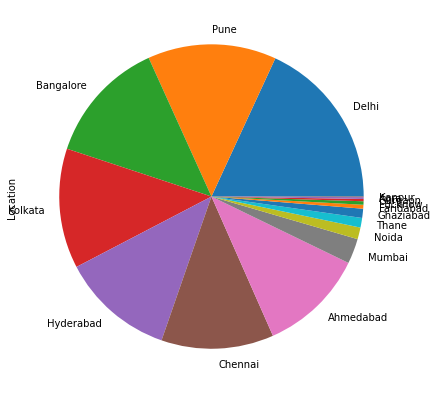

In [42]:
#We can see that by graphically
fig = plt.figure(figsize =(15, 7))
df['Location'].value_counts().plot.pie()

Here we can see that most of the location are from the metroplotian cities.

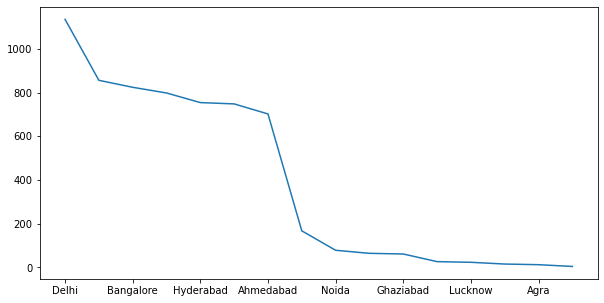

In [43]:
fig = plt.figure(figsize =(10, 5))
df['Location'].value_counts().plot()
plt.show()

Inferences:

There are 16 different locations

The Maximum number of cars are from Delhi

The Minimum number of cars are from Agra

#### ANALYSIS ON YEAR

In [44]:
df['Manufacturing_Year'].unique()

array([2010, 2017, 2019, 2013, 2016, 2014, 2018, 2011, 2021, 2008, 2015,
       2012, 2020, 2007, 2006, 2009, 2004, 2005, 1990, 2002, 1988, 1999,
       2003], dtype=int64)

<AxesSubplot:>

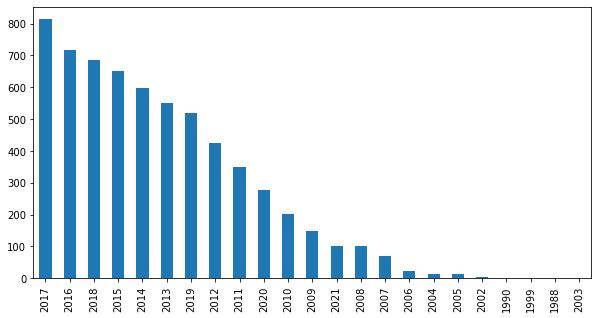

In [45]:
fig = plt.figure(figsize =(10, 5))
df['Manufacturing_Year'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

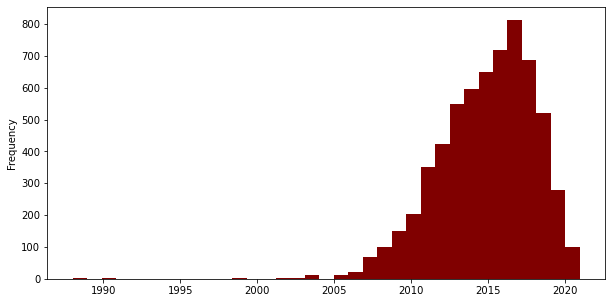

In [46]:
#lets draw the histogram
fig = plt.figure(figsize =(10, 5))
df['Manufacturing_Year'].plot(kind='hist',color='Maroon',bins=35)

Observations:

- The maximum number of cars are from the year 2017 and 2016.

- although the latest year in the data list is 2021 which had considerably lesser no. of cars.

- while the oldest car is from 1988.

#### ANALYSIS ON KILOMETERS DRIVEN

In [47]:
print("Mean kilometers driven in the data is:",df['Driven_Kilometers'].mean())
print("Maximum kilometers driven in the data is:",df['Driven_Kilometers'].max())
print("Minimum kilometers driven in the data is:",df['Driven_Kilometers'].min())

Mean kilometers driven in the data is: 55546.54747087921
Maximum kilometers driven in the data is: 4500000
Minimum kilometers driven in the data is: 48


<AxesSubplot:ylabel='Frequency'>

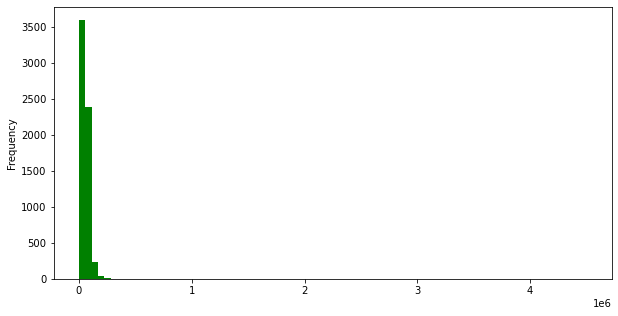

In [48]:
fig = plt.figure(figsize =(10, 5))
df['Driven_Kilometers'].plot(kind='hist',color='green',bins=80)

Observations:

The maximum kilometers car driven is 45,00000 km

The minimum is 48 kilometers

#### ANALYSIS ON FUEL TYPE

In [49]:
#Lets check the uniques of the data
df['Fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'Hybrid', 'Electric', 'LPG'],
      dtype=object)

In [50]:
#Counting the values
df['Fuel_type'].value_counts()

Diesel      3243
Petrol      2970
CNG           33
LPG           12
Hybrid         8
Electric       1
Name: Fuel_type, dtype: int64

<AxesSubplot:xlabel='Fuel_type', ylabel='count'>

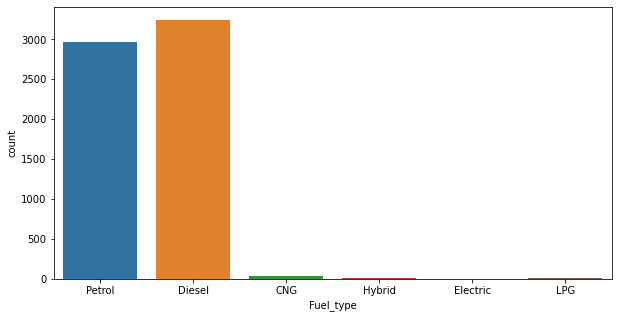

In [51]:
#Lets represent the countplot
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Fuel_type')

Observation:

- Most of the cars are diesel based

- Petrol cars are after that 

- Are very few and less are Electric , lpg,cng and hybrid cars

#### ANALYSIS ON TRANSMISSION

<AxesSubplot:xlabel='Car_Transmission', ylabel='count'>

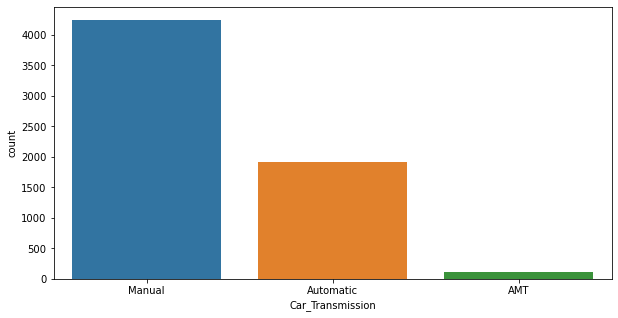

In [52]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Car_Transmission')

Observations:

- The number of manual cars are greater than tha Automatic cars

- Very few are AMT

#### ANALYSIS ON OWNER TYPE

In [53]:
#Counting the values
df['Owner_type'].value_counts()

First               5157
Second              1000
Third                 70
UnRegistered Car      25
Fourth                15
Name: Owner_type, dtype: int64

<AxesSubplot:xlabel='Owner_type', ylabel='count'>

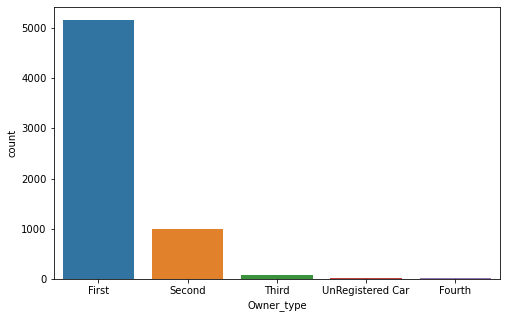

In [54]:
fig=plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Owner_type')

Observations:

- Around 5100 cars are first hand and less than 20 belongs to fourth Hand 

#### ANALYSIS ON MILEAGE

In [55]:
print("Minimum Mileage in the data is:",df['Mileage'].min())
print("Maximum Mileage in the data is:",df['Mileage'].max())
print("Range of Mileage is from {} to {}".format(df['Mileage'].min(),df['Mileage'].max()))

Minimum Mileage in the data is: 5.8
Maximum Mileage in the data is: 47.45
Range of Mileage is from 5.8 to 47.45


In [56]:
df['Mileage'].mean()

17.94200874605565

<AxesSubplot:ylabel='Frequency'>

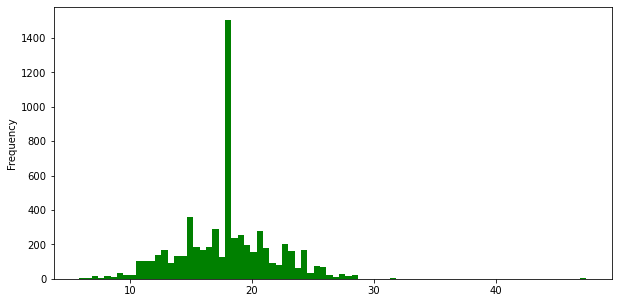

In [57]:
fig = plt.figure(figsize =(10, 5))
df['Mileage'].plot(kind='hist',color='green',bins=80)

The average mileage of the cars are 18 km/l while some have very low i.e less than 10 km/l

<AxesSubplot:xlabel='Mileage'>

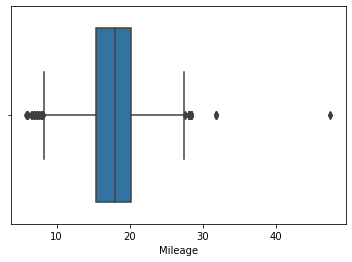

In [58]:
sns.boxplot(df['Mileage'])

With the help of boxplot:
 - The average mileage of the cars are 18-20kmpl

#### ANALYSIS ON ENGINE

In [59]:
print("Minimum engine volume in the data is:",df.Engine.min())
print("Maximum engine volume in the data is:",df.Engine.max())
print("Range of engine volume is from {} to {}".format(df.Engine.min(),df.Engine.max()))

Minimum engine volume in the data is: 4.0
Maximum engine volume in the data is: 6752.0
Range of engine volume is from 4.0 to 6752.0


In [60]:
print("Mean engine volume in the data is:",df.Engine.mean())

Mean engine volume in the data is: 1678.3225951994352


<AxesSubplot:xlabel='Engine'>

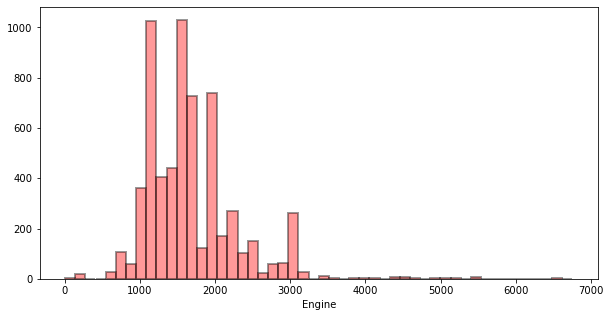

In [61]:
fig= plt.figure(figsize=(10,5))
sns.distplot(df['Engine'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2), color='red')

Observations -

- Minimum engine volume in the data is: 4.0 CC

- Maximum engine volume in the data is: 6752.0 CC

- Mean of  engine volume in the data is : 1678 CC

#### ANALYSIS ON POWER

In [62]:
df.columns

Index(['Brand', 'Model', 'Variant', 'Location', 'Manufacturing_Year',
       'Driven_Kilometers', 'Fuel_type', 'Owner_type', 'Engine',
       'Car_Transmission', 'Mileage', 'Price', 'Power(bhp)'],
      dtype='object')

In [63]:
print("Minimum power in the data is:",df['Power(bhp)'].min())
print("Maximum power in the data is:",df['Power(bhp)'].max())
print("Range of power is from {} to {}".format(df['Power(bhp)'].min(),df['Power(bhp)'].max()))

Minimum power in the data is: 25.0
Maximum power in the data is: 616.0
Range of power is from 25.0 to 616.0


In [64]:
df['Power(bhp)'].mean()

124.94827460288437

<AxesSubplot:xlabel='Power(bhp)'>

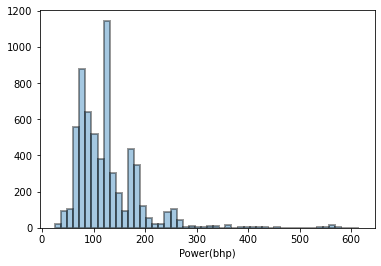

In [65]:
sns.distplot(df['Power(bhp)'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

Observation- 

- The average power in the data is : 124.94

- Minimum power in the data is: 25.0

- Maximum power in the data is: 616.0

- Range of power is from 25.0 to 616.0

#### ANALYSIS ON PRICE

In [66]:
print("Minimum price in the data is:",df.Price.min())
print("Maximum price in the data is:",df.Price.max())
print("Price range is from {} to {}".format(df.Price.min(),df.Price.max()))

Minimum price in the data is: 0.0
Maximum price in the data is: 2.5226544976041465
Price range is from 0.0 to 2.5226544976041465


In [67]:
df.Price.mean()

1.085923015456205

<AxesSubplot:ylabel='Frequency'>

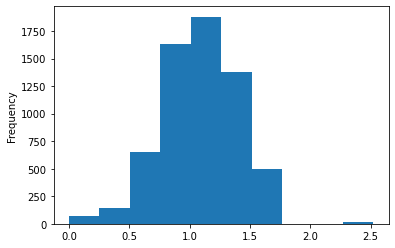

In [68]:
df.Price.plot(kind='hist')

Observations :

- here the data is very high as there are some outliers present in the data as some cars values were in thousand

### Bivariate Analysis

### RELATIONSHIP OF PRICE WITH OTHER PARAMETER

<AxesSubplot:title={'center':'Fuel_type vs Price'}, xlabel='Fuel_type', ylabel='Price'>

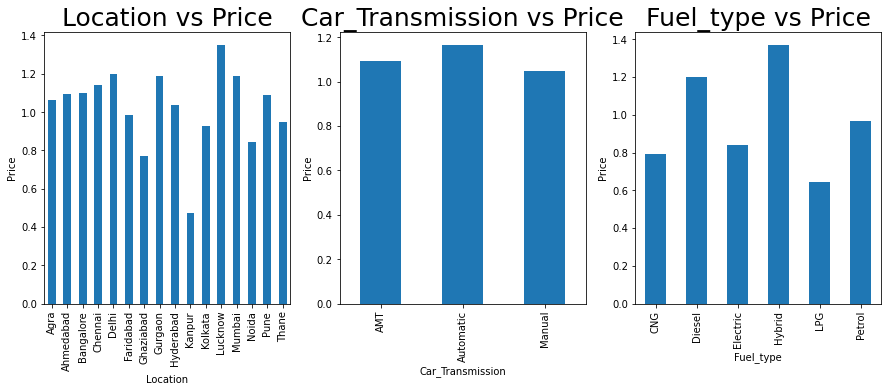

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Location vs Price',fontsize = 25)
plt.ylabel("Price")
df.groupby('Location')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Car_Transmission vs Price',fontsize = 25)
plt.ylabel("Price")
df.groupby('Car_Transmission')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Fuel_type vs Price',fontsize = 25)
plt.ylabel("Price")
df.groupby('Fuel_type')['Price'].mean().plot.bar()

Observations:

- The cars of Lucknow and Delhi have the maximum price and kanpur has the minimum price car.

- Automatic cars have more price than manuals ones.

- Hybrid and Diesel cars have the maximum price while LPG  cars have the lower price among all..

In [70]:
# Find most important features relative to target Price
print("Find most important features relative to Price-target")
corr = df.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Find most important features relative to Price-target
Price                 1.000000
Manufacturing_Year    0.455744
Power(bhp)            0.149988
Engine                0.089487
Driven_Kilometers    -0.044542
Mileage              -0.045391
Name: Price, dtype: float64


Here we can see that the manufacturing year is important feature relative to Price-target

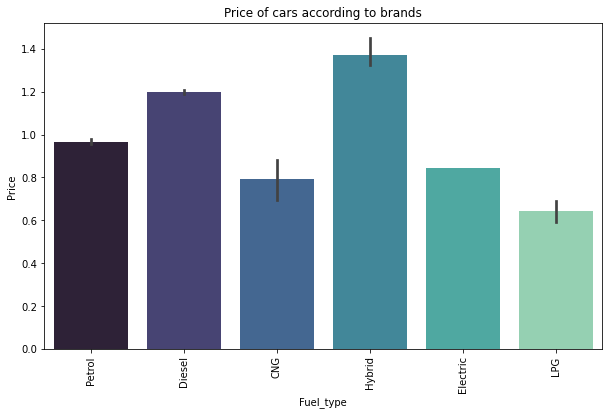

In [71]:
plt.figure(figsize=(10,6))
plt.title("Price of cars according to brands")
sns.barplot(x="Fuel_type", y="Price", data= df, palette="mako")
plt.xticks(rotation=90)
plt.show()

Hybrid cars are very expensive in our data , while after that Diesel and petrol cars are expensive.

#### Brand vs Price

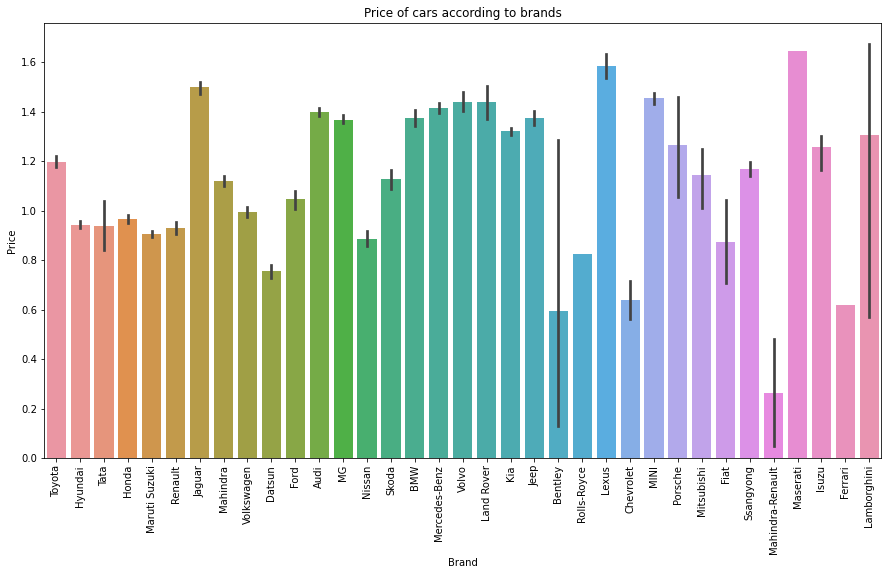

In [72]:
plt.figure(figsize=(15,8))
plt.title("Price of cars according to brands")
sns.barplot(x="Brand", y="Price", data= df)
plt.xticks(rotation=90)
plt.show()

Observations :-

- The Most expensive brand is Maserati,Lamborgini and then Lexus also jaguar cars.

- Mahindra-Renault , MINI and Datsun have lower price among the rest

#### Power vs Price

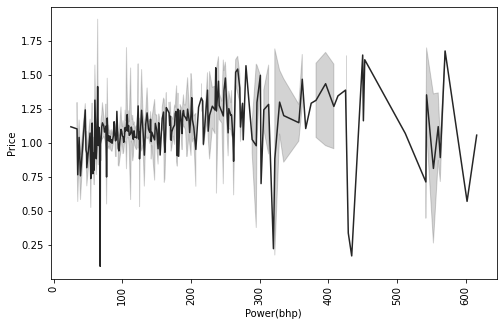

In [73]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['Power(bhp)'], y=df['Price'], color=".15")
plt.xticks(rotation=90)
plt.show()

To get a better view of this positive correlation, let us plot a scatterplot

<AxesSubplot:xlabel='Power(bhp)', ylabel='Price'>

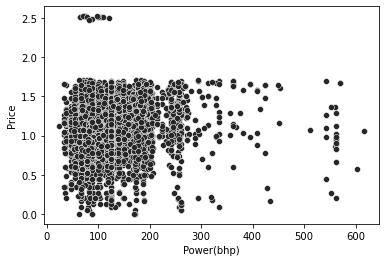

In [74]:
sns.scatterplot(x=df['Power(bhp)'], y=df['Price'], color=".15")

We can see the two variables were strongly correlated till 300bph, after which the correlation has weakened considerably.

#### KM driven vs Price

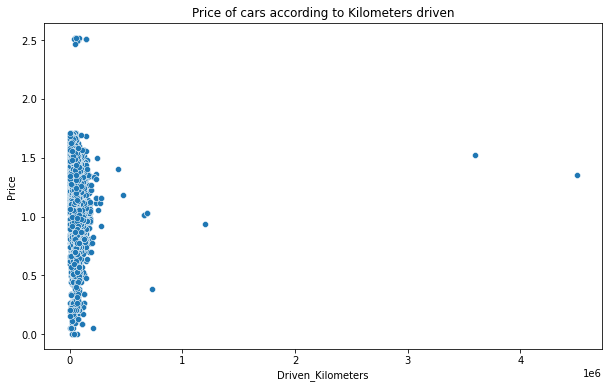

In [75]:
plt.figure(figsize=(10,6))
plt.title("Price of cars according to Kilometers driven")
sns.scatterplot(x="Driven_Kilometers", y="Price", data= df)
plt.show()

Fascinating graph, we can see a very faint negative correlation between both. Some of the cars with more km's cost more than the one's with lowest km's.

#### Mileage (km/l) vs Price

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

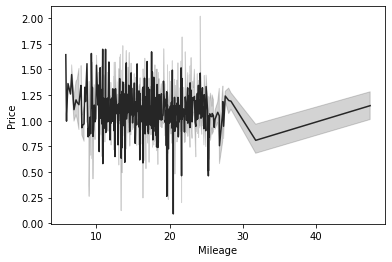

In [76]:
sns.lineplot(x=df['Mileage'], y=df['Price'], color=".15")

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

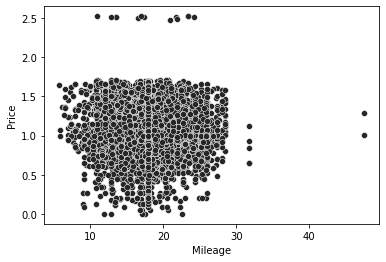

In [77]:
sns.scatterplot(x=df['Mileage'], y=df['Price'], color=".15")

We can see no clear pattern here, the cars with high mileage are low priced. Most of the data is clustered between 10 and 30 km/l

#### Year vs Price

In [78]:
df.columns

Index(['Brand', 'Model', 'Variant', 'Location', 'Manufacturing_Year',
       'Driven_Kilometers', 'Fuel_type', 'Owner_type', 'Engine',
       'Car_Transmission', 'Mileage', 'Price', 'Power(bhp)'],
      dtype='object')

<AxesSubplot:xlabel='Manufacturing_Year', ylabel='Price'>

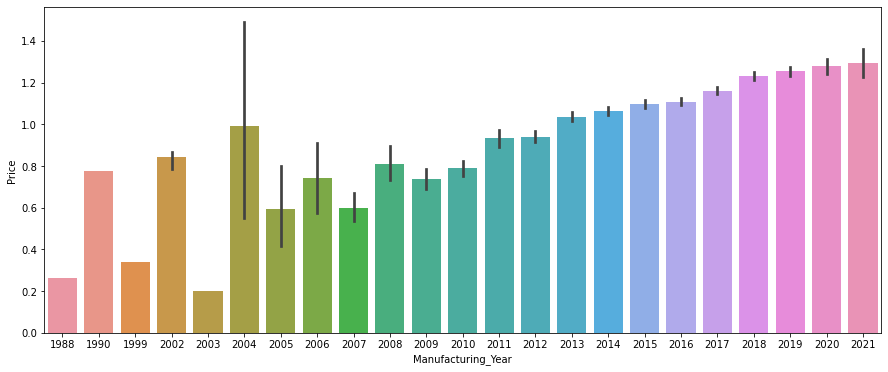

In [79]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Manufacturing_Year", y="Price", data=df)

<AxesSubplot:title={'center':'Year vs Price'}, xlabel='Manufacturing_Year', ylabel='Price'>

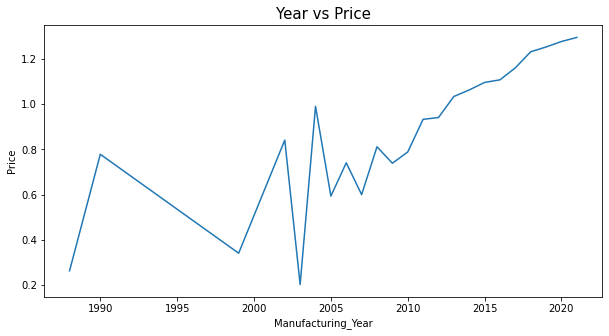

In [81]:
plt.figure(figsize=(10,5))
plt.title('Year vs Price',fontsize = 15)
plt.ylabel("Price")
df.groupby('Manufacturing_Year')['Price'].mean().plot.line()

The prices of the cars from  year 2014 to till now is increases and in 2003 it comes to the lowest.

FACTORS AFFECTING POWER

<AxesSubplot:title={'center':'Brand vs Power'}, xlabel='Brand', ylabel='Power(bhp)'>

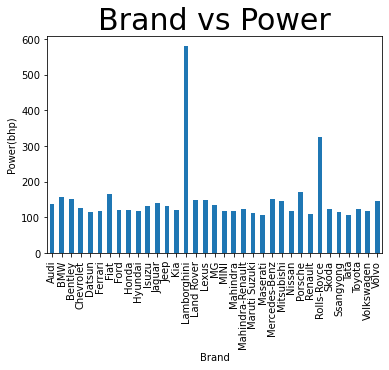

In [87]:
plt.title('Brand vs Power',fontsize = 30)
plt.ylabel("Power(bhp)")
df.groupby('Brand')['Power(bhp)'].mean().plot.bar()

Lambhorgini have the power  which is more than the rest. Reanault and tata has the least.

<AxesSubplot:xlabel='Owner_type', ylabel='Manufacturing_Year'>

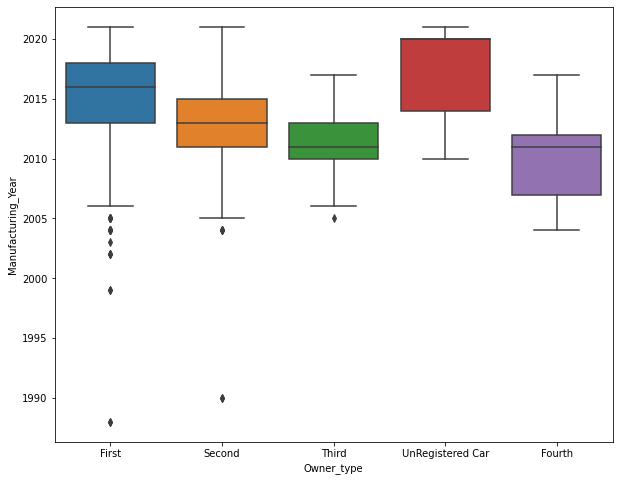

In [89]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Owner_type', y='Manufacturing_Year', data=df, width=0.8)

There are many cars which are First hand only.

### Q.)Which company sells most Number of cars?

In [90]:
companies=df['Brand'].str.lower().str.split().str.get(0).unique()

In [91]:
len(companies)

35

In [92]:
companies

array(['toyota', 'hyundai', 'tata', 'honda', 'maruti', 'renault',
       'jaguar', 'mahindra', 'volkswagen', 'datsun', 'ford', 'audi', 'mg',
       'nissan', 'skoda', 'bmw', 'mercedes-benz', 'volvo', 'land', 'kia',
       'jeep', 'bentley', 'rolls-royce', 'lexus', 'chevrolet', 'mini',
       'porsche', 'mitsubishi', 'fiat', 'ssangyong', 'mahindra-renault',
       'maserati', 'isuzu', 'ferrari', 'lamborghini'], dtype=object)

In [93]:
company_count=df['Brand'].str.lower().str.split().str.get(0).to_frame()["Brand"].value_counts()

<AxesSubplot:title={'center':'Cars sold per company'}, xlabel='Company Name', ylabel='No. of cars sold'>

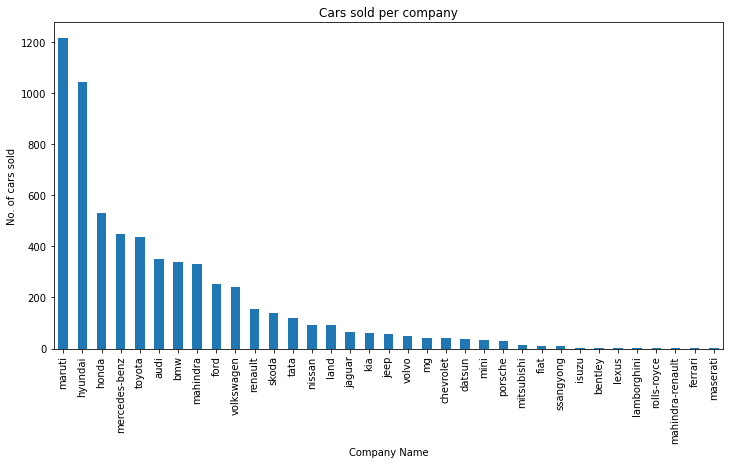

In [94]:
plt.figure(figsize=(12,6))
plt.xlabel('Company Name')
plt.ylabel('No. of cars sold')
plt.title('Cars sold per company')
company_count.plot(kind='bar')

Maruti followed by hyundai has the most number of selling cars

#### Q.)Which fuel Type has lesser mileage?

In [95]:
fuel_type=df['Fuel_type'].str.lower().unique()
fuel_type

array(['petrol', 'diesel', 'cng', 'hybrid', 'electric', 'lpg'],
      dtype=object)

In [96]:
mileage = df.groupby('Fuel_type').Mileage.mean()
print(mileage)

Fuel_type
CNG         19.015760
Diesel      17.985471
Electric     8.860000
Hybrid      16.987751
LPG         18.394669
Petrol      17.886421
Name: Mileage, dtype: float64


<AxesSubplot:title={'center':'Mileage v/s Fuel Type'}, xlabel='Fuel_type', ylabel='Average Mileage'>

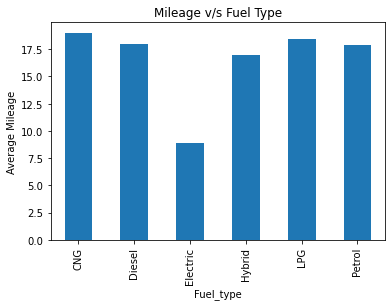

In [97]:
plt.xlabel('Fuel Type')
plt.ylabel('Average Mileage')
plt.title('Mileage v/s Fuel Type')
mileage.plot(kind='bar')

It can be observed that electric cars are not good at mileage.Electric being worst and CNG being best.

#### Q.) What is the number of cars originally purchased per year?

In [98]:
year = df['Manufacturing_Year'].value_counts()
year

2017    813
2016    718
2018    687
2015    650
2014    597
2013    550
2019    520
2012    424
2011    351
2020    278
2010    202
2009    149
2021    101
2008    100
2007     69
2006     22
2004     13
2005     13
2002      3
1990      2
1999      2
1988      2
2003      1
Name: Manufacturing_Year, dtype: int64

<AxesSubplot:title={'center':'Cars purchased per year'}, xlabel='Year', ylabel='No.of Cars'>

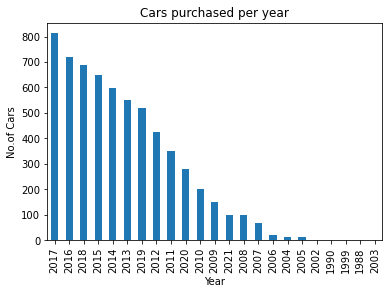

In [99]:
plt.xlabel('Year')
plt.ylabel('No.of Cars')
plt.title('Cars purchased per year')
year.plot(kind='bar')

The maximum number of cars are purchased in the year 2017 after that from 2016

#### What is the average price per company?

In [100]:
p = df.groupby('Brand').Price.mean()

<AxesSubplot:title={'center':'Average price of cars per company'}, xlabel='Brand', ylabel='Average price (in lacs) in rupees'>

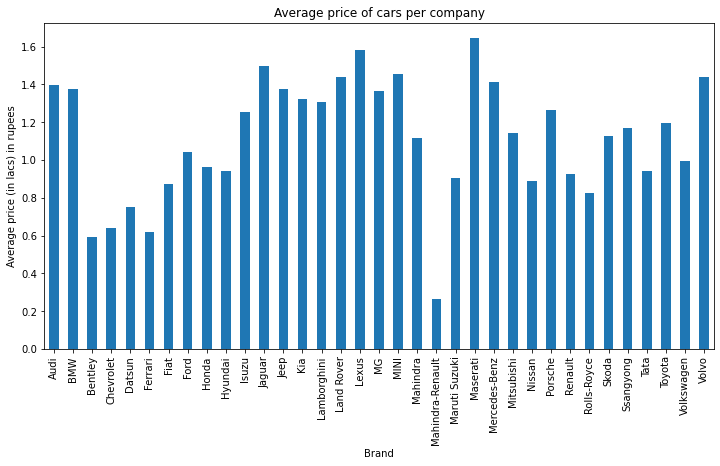

In [101]:
plt.figure(figsize=(12,6))
plt.xlabel('Company Name')
plt.ylabel('Average price (in lacs) in rupees')
p.plot(kind='bar', title = 'Average price of cars per company')

Hence, The cheapest car producer is Mahindra-Renault and the most expensive company is Maserati.

#### Q) After driving for how much KMs people like to sell their cars?

<AxesSubplot:title={'center':'km_driven vs company plot'}, xlabel='Brand', ylabel='Average km_driven'>

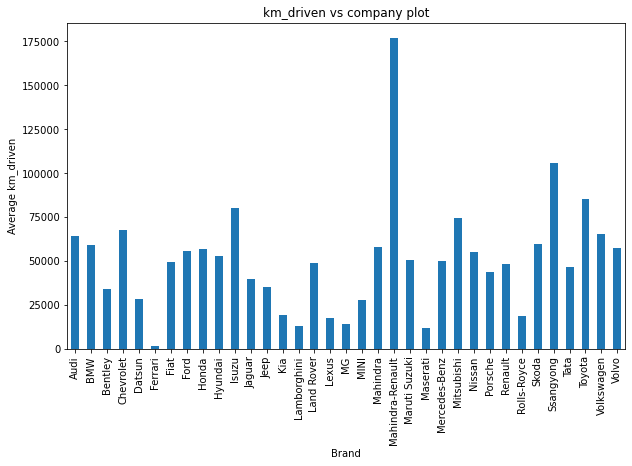

In [102]:
km = df.groupby('Brand').Driven_Kilometers.mean()
plt.figure(figsize=(10,6))
plt.xlabel('Company Name')
plt.ylabel('Average km_driven')
km.plot(kind='bar', title = 'km_driven vs company plot')

Expensive company cars are sold before being driven much, while Mahindra-Renault cars are sold after driving many kilometers.

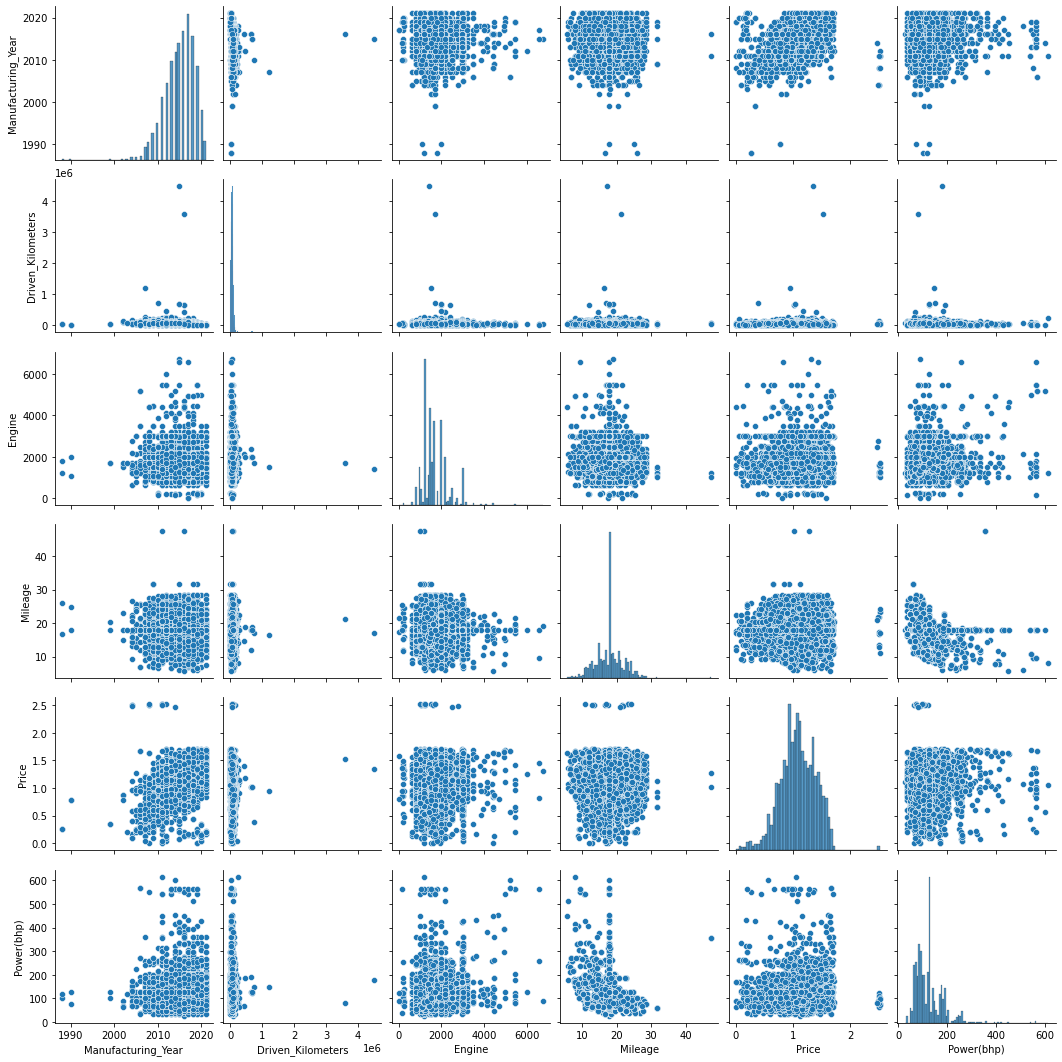

In [103]:
sns.pairplot(df)

In [104]:
df["Current_Year"]=2021

In [105]:
df["No_of_years"]=df["Current_Year"]-df["Manufacturing_Year"]
df=df.drop(["Current_Year","Manufacturing_Year"],axis=1)
df.head()

,Brand,Model,Variant,Location,Driven_Kilometers,Fuel_type,Owner_type,Engine,Car_Transmission,Mileage,Price,Power(bhp),No_of_years
0,Toyota,Corolla Altis,1.8 GL,Delhi,89000,Petrol,First,1794.000000,Manual,9.800000,0.756780,132.000000,11
1,Hyundai,Creta,1.6 SX Plus AT Petrol,Delhi,57000,Petrol,First,1591.000000,Automatic,15.290000,1.202154,122.000000,4
2,Tata,Tiago,Revotron XZ,Delhi,11264,Petrol,First,1199.000000,Manual,23.840000,0.939282,84.000000,2
3,Honda,City,1.5 E MT,Delhi,62904,Petrol,First,1678.322595,Manual,17.942009,0.904289,124.948275,8
4,Maruti Suzuki,Alto 800,Lxi,Noida,41360,Petrol,First,796.000000,Manual,22.740000,0.593841,47.000000,8


### Feature Engineering

#### Checking and Removing Skewness

In [106]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

continuous_feature=['Driven_Kilometers','Engine','Mileage','Power(bhp)','No_of_years']
for col in continuous_feature:
    if df.skew().loc[col]>=0.55:
        df[col]=np.log1p(df[col])
    if df.skew().loc[col]<=-0.55:
        df[col]=np.cbrt(df[col])

In [107]:
df.skew()

Driven_Kilometers   -2.126467
Engine              -3.836347
Mileage              0.202961
Price               -0.147617
Power(bhp)           0.353153
No_of_years         -3.888133
dtype: float64

Almost from every columns skewness value is near to zero.

### Checking for Outliers

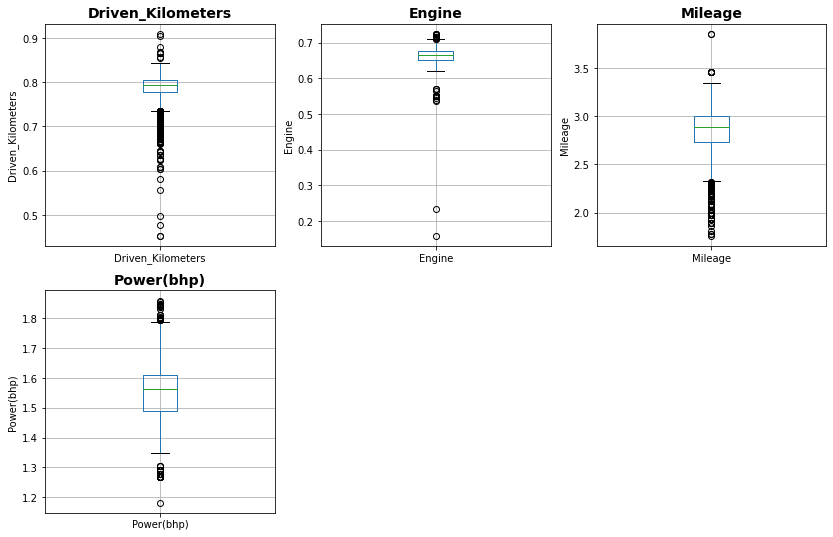

In [108]:
a = 2  # number of rows
b = 3 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,9))    
for feature in continuous_feature:
    data=df.copy()   
    if 0 in data[feature].unique():
        pass
    else:
        plt.subplot(a, b, c)
        data[feature]=np.log(data[feature])
        plt.title('{}'.format(feature),fontsize=14,fontweight='bold')
        plt.ylabel(feature)
        data.boxplot(column=feature)
        c = c + 1
plt.show()

Here we can see that there are some outliers present in the continuous feature dataset.

####  Using Z-score
Here Z-score applied to see the outlier. If z-score>3 then its a outlier

In [109]:
outliers=[]
z_value=[]

# Create Function for Outlier detection by Z-test

def detect_outliers(data):
    
# This is  3rd STD threshold  
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        z_value.append(z_score)
        #print(z_score)
        # This Z value <-3 or >3 are outlier, so taken abs(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

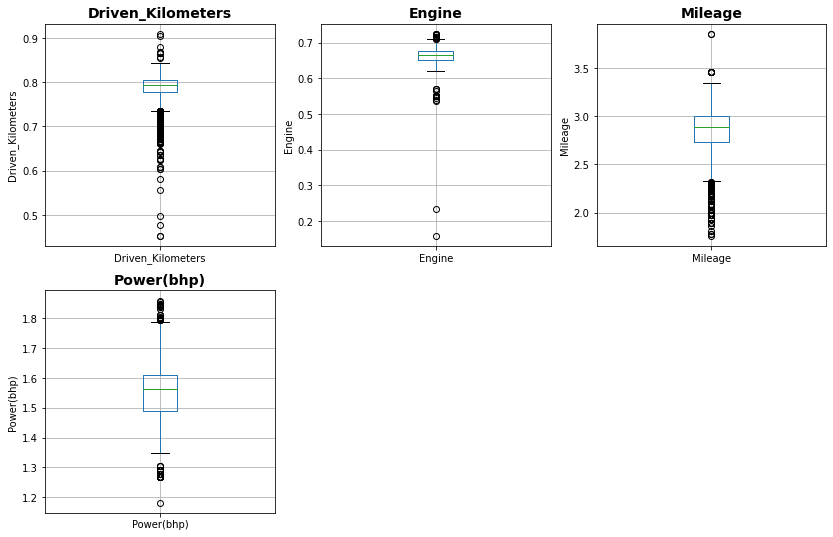

In [110]:
a = 2  # number of rows
b = 3 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,9))

    
for feature in continuous_feature:
    data=df.copy()
    # Call Function
    outlier = detect_outliers(data[feature])
    
    if 0 in data[feature].unique():
        pass
    else:
        plt.subplot(a, b, c)
        data[feature]=np.log(data[feature])
        plt.title('{}'.format(feature),fontsize=14,fontweight='bold')
        plt.ylabel(feature)
        data.boxplot(column=feature)
        c = c + 1
plt.show()


#### Using Scatter Plot - Feature vs Price
Here Z-score applied to see the outlier. If z-score>3 then its a outlier

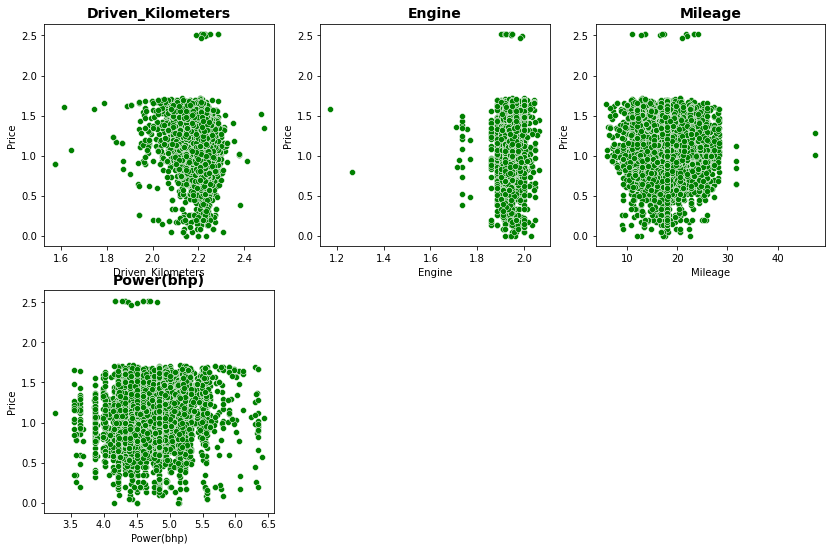

In [111]:
a = 2  # number of rows
b = 3 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,9))

    
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.subplot(a, b, c)
        plt.title('{}'.format(feature),fontsize=14,fontweight='bold')
        plt.xlabel(feature)
        sns.scatterplot(x = data[feature], y = data['Price'],color='green')
        c = c + 1
plt.show()


### Label Encoding

In [112]:
df=df.drop(['Model','Variant'],axis=1)

In [113]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Brand', 'Location', 'Fuel_type', 'Owner_type', 'Car_Transmission']

In [114]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [115]:
for i in column:
    df[i]=label.fit_transform(df[i])

In [116]:
print(df.shape)

(6267, 11)


#### Removing outliers

In [117]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [118]:
print(df.shape)
print(df_new.shape)
df=df_new
print("Shape after removing ouliers",df.shape)

(6267, 11)
(5794, 11)
Shape after removing ouliers (5794, 11)


In [119]:
#lets divide the train dataset into input and output
df_x=df.drop(columns=["Price"])
y=df[["Price"]]

In [120]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(df_x)

x=pd.DataFrame(X,columns=df_x.columns)
x.head()

,Brand,Location,Driven_Kilometers,Fuel_type,Owner_type,Engine,Car_Transmission,Mileage,Power(bhp),No_of_years
0,1.562339,-0.531323,0.984899,1.069463,-0.444178,0.399476,0.663490,-2.157036,0.379653,1.196865
1,-0.742777,-0.531323,0.356411,1.069463,-0.444178,0.024551,-1.507182,-0.687535,0.180227,-0.370209
2,1.462116,-0.531323,-2.086104,1.069463,-0.444178,-0.874880,0.663490,1.601030,-0.762584,-1.572374
3,-0.843000,-0.531323,0.496874,1.069463,-0.444178,0.191870,0.663490,0.022324,0.240661,0.729689
4,0.459892,1.468702,-0.106610,1.069463,-0.444178,-2.220374,0.663490,1.306595,-2.220559,0.729689


In [121]:
x.shape

(5794, 10)

In [122]:
y.shape

(5794, 1)

### Prediction with  Price:

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [124]:
X_train.head(3)

,Brand,Location,Driven_Kilometers,Fuel_type,Owner_type,Engine,Car_Transmission,Mileage,Power(bhp),No_of_years
4999,1.361894,-1.197998,-1.522083,-0.931334,-0.444178,-0.165026,0.663490,1.378865,-1.331903,0.286909
5043,-0.742777,-1.197998,-1.229805,1.069463,-0.444178,0.006740,-1.507182,0.037846,0.008643,-0.858400
4204,-0.742777,0.802027,-0.171281,1.069463,-0.444178,-0.167133,0.663490,0.022324,0.240661,1.196865


In [131]:
X_test.head(3)

,Brand,Location,Driven_Kilometers,Fuel_type,Owner_type,Engine,Car_Transmission,Mileage,Power(bhp),No_of_years
1840,0.459892,1.690927,0.116790,1.069463,-0.444178,-0.244046,-1.507182,0.011079,0.455255,0.526624
1826,0.660337,1.690927,-1.534733,-0.931334,-0.444178,-1.095132,-1.507182,-1.354030,1.896303,-1.572374
5769,-0.742777,-0.531323,-3.795874,1.069463,-0.444178,0.191870,0.663490,0.022324,0.240661,-0.858400


#### Model Training

In [125]:
def evaluate(model, X_train, y_train, X_test, y_test):
    print('TRAIN')
    pred = model.predict(X_train)
    print(f'MEAN ABSOLUTE ERROR: {mean_absolute_error(y_train, pred)}')
    print(f'MEAN SQUARED ERROR: {mean_squared_error(y_train, pred)}')
    print(f'ROOT MEAN SQUARED ERROR: {np.sqrt(mean_squared_error(y_train, pred))}')
    print(f'R2 SCORE: {r2_score(y_train, pred)}')
    print('###############################')
    print('TEST')
    pred = model.predict(X_test)
    print(f'MEAN ABSOLUTE ERROR: {mean_absolute_error(y_test, pred)}')
    print(f'MEAN SQUARED ERROR: {mean_squared_error(y_test, pred)}')
    print(f'ROOT MEAN SQUARED ERROR: {np.sqrt(mean_squared_error(y_test, pred))}')
    print(f'R2 SCORE: {r2_score(y_test, pred)}')

#### Linear Regression

In [127]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [128]:
evaluate(model, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.1719485182997844
MEAN SQUARED ERROR: 0.049014285770311194
ROOT MEAN SQUARED ERROR: 0.2213917021261438
R2 SCORE: 0.4297788451637867
###############################
TEST
MEAN ABSOLUTE ERROR: 0.17678998224098372
MEAN SQUARED ERROR: 0.050628386149277824
ROOT MEAN SQUARED ERROR: 0.2250075246503499
R2 SCORE: 0.40765353841099095


#### Lasso

In [129]:
param_grid = {
    'alpha': [0.1, 0.01, 0.0001, 0.002, 0.00105, 0.000001]
}
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid=param_grid, 
                          scoring='neg_mean_squared_error',cv=10).fit(X_train, y_train)
evaluate(lasso_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.1719486857761432
MEAN SQUARED ERROR: 0.049014285779438525
ROOT MEAN SQUARED ERROR: 0.22139170214675735
R2 SCORE: 0.42977884505760144
###############################
TEST
MEAN ABSOLUTE ERROR: 0.17679001785610793
MEAN SQUARED ERROR: 0.05062833748847425
ROOT MEAN SQUARED ERROR: 0.2250074165188211
R2 SCORE: 0.4076541077369562


#### Ridge

In [134]:
ridge = Ridge()
param_grid = {
    'alpha': [12, 12.1, 12.2, 12.3, 11.9, 11.8],
}
ridge_grid = GridSearchCV(ridge, param_grid=param_grid, 
                          scoring='neg_mean_squared_error', 
                          cv=10).fit(X_train, y_train)
evaluate(ridge_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.1719642481481294
MEAN SQUARED ERROR: 0.0490145740263815
ROOT MEAN SQUARED ERROR: 0.22139235313438788
R2 SCORE: 0.42977549165762585
###############################
TEST
MEAN ABSOLUTE ERROR: 0.17680167210029218
MEAN SQUARED ERROR: 0.050628505390298
ROOT MEAN SQUARED ERROR: 0.22500778962137732
R2 SCORE: 0.4076521433043768


#### SVR

In [136]:
model=SVR()
model.fit(X_train,y_train)
evaluate(model, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.1251925962943703
MEAN SQUARED ERROR: 0.02953915502419832
ROOT MEAN SQUARED ERROR: 0.1718695872578925
R2 SCORE: 0.6563481273660237
###############################
TEST
MEAN ABSOLUTE ERROR: 0.1529580688986464
MEAN SQUARED ERROR: 0.04364449148333298
ROOT MEAN SQUARED ERROR: 0.20891264079354552
R2 SCORE: 0.4893643257405569


#### KNeighborsRegressor

In [133]:
model=KNeighborsRegressor()
model.fit(X_train,y_train)
evaluate(model, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.13445994688473897
MEAN SQUARED ERROR: 0.03223807788122691
ROOT MEAN SQUARED ERROR: 0.17954965296882897
R2 SCORE: 0.6249494670741934
###############################
TEST
MEAN ABSOLUTE ERROR: 0.1713240153596299
MEAN SQUARED ERROR: 0.05032970954756587
ROOT MEAN SQUARED ERROR: 0.22434283930530494
R2 SCORE: 0.41114802128196093


#### Random Forest Regressor

In [137]:
Rfr = RandomForestRegressor(random_state = 42)
param_grid = {  'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
             }

random_grid= GridSearchCV(Rfr, param_grid=param_grid, scoring='neg_mean_squared_error',
                          cv=10).fit(X_train, y_train)
evaluate(random_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.03657002102835369
MEAN SQUARED ERROR: 0.0030744717396464063
ROOT MEAN SQUARED ERROR: 0.05544791916426085
R2 SCORE: 0.9642322886411542
###############################
TEST
MEAN ABSOLUTE ERROR: 0.09467836176538097
MEAN SQUARED ERROR: 0.018333815225281873
ROOT MEAN SQUARED ERROR: 0.1354024195695257
R2 SCORE: 0.7854964101738936


#### Conclusion:

- Random forest regressor model gives the very less rmse value and a good R2 score

- This model is our final model for predicting the test data.

### Model Prediction

In [138]:
evaluate(random_grid, X_train, y_train, X_test, y_test)

TRAIN
MEAN ABSOLUTE ERROR: 0.03657002102835369
MEAN SQUARED ERROR: 0.0030744717396464063
ROOT MEAN SQUARED ERROR: 0.05544791916426085
R2 SCORE: 0.9642322886411542
###############################
TEST
MEAN ABSOLUTE ERROR: 0.09467836176538097
MEAN SQUARED ERROR: 0.018333815225281873
ROOT MEAN SQUARED ERROR: 0.1354024195695257
R2 SCORE: 0.7854964101738936


In [139]:
pred = random_grid.predict(X_test)

In [140]:
test_pred = np.expm1(pred)

In [142]:
submission = pd.DataFrame({
    'Price': test_pred
})

In [158]:
submission.head(10)

,Price
0,1.428006
1,3.967793
2,1.910505
3,1.577868
4,0.806396
5,2.396572
6,0.952870
7,2.504203
8,1.104306
9,3.952862


Text(0, 0.5, 'Predicted_Y')

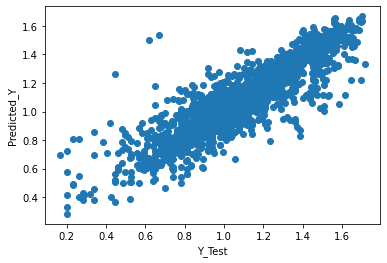

In [145]:
#Checking the diff. between actual and predicted value using graph
plt.scatter(x=y_test,y=pred)
plt.xlabel("Y_Test")
plt.ylabel("Predicted_Y")

In [148]:
#Lets save the submission to csv
submission.to_csv("Car_price_prediction.csv",index=False)

#### Saving the model

In [154]:
#saving the model
import joblib
model=joblib.dump(random_grid,'Car_Price_model.obj')

#### Conclusions :


- The prediction of Car price we find out that the  Price is Correlated with the 
    1. Manufacturing Year(The year or edition of the model)
    2. Power(in bhp) of the car and
    3. Engine of the car
    
    
- That Means if the manufacturing year of the car is recent its price is will be high, i.e. the newer the car the higher will be the prices.

- The Power of the Lamborgini is highest among the all, while the  Maserati is the expensive car producer.

- Second the Power and engine of the car are also important for buying the used car.

- Expensive company cars are sold before being driven much, while Mahindra-Renault cars are sold after driving many kilometers.

- Maruti and hyundai  car brands has the most number of selling cars in India.

- In this project we use different models like Linear Regression, Lasso, Ridge, SVR, KNN Regression and Random Forest Regression.

- Here we select the RandomForestRegressor model for our final model training and testing as it gives the very less root mean squared error value and also its R2 score is highest among the all models we choose.
